In [8]:
%load_ext autoreload   
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from domino import BarlowSlicer


In [9]:
import meerkat as mk
mk.__file__

'/Users/eyubogln/code/meerkat/meerkat/__init__.py'

In [10]:
import domino
import dcbench

task = dcbench.tasks["slice_discovery"]

In [11]:
dcbench.config.celeba_dir = "/Users/eyubogln/data/celeba"

In [5]:
problem = task.problems["p_72776"]

In [6]:

emb_dp = domino.embed(
    problem["base_dataset"],
    input_col="image"
)

100%|███████████████████████████████████████| 338M/338M [00:14<00:00, 24.7MiB/s]


  0%|          | 0/1583 [00:00<?, ?it/s]

In [7]:
emb_dp.write("celeba_embs.mk")

In [66]:
import datetime
import uuid
f"{datetime.date.today():%y-%m-%d}-{str(uuid.uuid4())[:8]}"

'22-06-07-ad877ca0'

In [61]:
import ray.cloudpickle as pickle
out = pickle.dumps(problem)
pickle.loads(out)

SliceDiscoveryProblem(artifacts={'activations': 'DataPanelArtifact', 'base_dataset': 'VisionDatasetArtifact', 'clip': 'DataPanelArtifact', 'model': 'ModelArtifact', 'test_predictions': 'DataPanelArtifact', 'test_slices': 'DataPanelArtifact', 'val_predictions': 'DataPanelArtifact'}, attributes={'alpha': 0.2, 'dataset': 'celeba', 'n_pred_slices': 5, 'slice_category': 'correlation', 'slice_names': ['wearing_lipstick=0_young=1', 'wearing_lipstick=1_young=0'], 'target_name': 'wearing_lipstick'})

In [ ]:

emb_dp = domino.embed(
    problem["base_dataset"],
    input_col="image",
    encoder="robust",
)

In [57]:
dp = dcbench.VisionDatasetArtifact("celeba").load()

In [13]:
emb_dp = mk.DataPanel.read("celeba_embs.mk")

In [73]:
from domino.eval.run import run_sdm
from domino._slice.multiaccuracy import MultiaccuracySlicer

solution, metrics = run_sdm(
    problem,
    emb_dp=emb_dp,
    embedding_col="clip(image)",
    slicer_class=MultiaccuracySlicer,
    slicer_config=dict(
    )
)

In [74]:
solution

SliceDiscoverySolution(artifacts={'pred_slices': 'DataPanelArtifact'}, attributes={'problem_id': 'p_72776', 'slicer_class': <class 'domino._slice.multiaccuracy.MultiaccuracySlicer'>, 'slicer_config': {}, 'embedding_column': 'clip(image)'})

In [33]:
from domino.eval.run import run_sdms

solutions, metrics = run_sdms(list(task.problems.values())[63:200], emb_dp=emb_dp,
    embedding_col="clip(image)",
    slicer_class=domino.DominoSlicer,
    slicer_config=dict(
        n_slices=5,
        y_hat_log_likelihood_weight=10,
        y_log_likelihood_weight=10,
    ),
)

  0%|          | 0/137 [00:00<?, ?it/s]

/Users/eyubogln/code/domino/domino/_slice/domino.py:557: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [38]:
(metrics["precision-at-10"] >= 0.8).mean()

0.3357664233576642

In [16]:
dp = problem.merge()
dp = dp.merge(emb_dp, on="id", how="left")

In [41]:
from domino._slice.barlow import BarlowSlicer
from domino.MultiaccuracySlicer import MultiaccuracySlicer

slicer = MultiaccuracySlicer()
slicer.fit(
    dp,
    embeddings="clip(image)",
    targets="target",
    pred_probs="probs",
)
slices = slicer.predict(
    dp,
    embeddings="clip(image)",
)

In [47]:
problem

SliceDiscoveryProblem(artifacts={'activations': 'DataPanelArtifact', 'base_dataset': 'VisionDatasetArtifact', 'clip': 'DataPanelArtifact', 'model': 'ModelArtifact', 'test_predictions': 'DataPanelArtifact', 'test_slices': 'DataPanelArtifact', 'val_predictions': 'DataPanelArtifact'}, attributes={'alpha': 0.2, 'dataset': 'celeba', 'n_pred_slices': 5, 'slice_category': 'correlation', 'slice_names': ['wearing_lipstick=0_young=1', 'wearing_lipstick=1_young=0'], 'target_name': 'wearing_lipstick'})

In [42]:
slices

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

,id (PandasSeriesColumn),target (NumpyArrayColumn),probs (ClassificationOutputColumn),split_x (PandasSeriesColumn),image_x (ImageColumn),identity_x (PandasSeriesColumn),image_y (ImageColumn),identity_y (PandasSeriesColumn),split_y (PandasSeriesColumn),clip(image) (NumpyArrayColumn)
0,132925.jpg,1,torch.Tensor(shape=torch.Size([2])),valid,,7722,,7722,train,"np.ndarray(shape=(512,))"
1,013321.jpg,0,torch.Tensor(shape=torch.Size([2])),valid,,7685,,7685,train,"np.ndarray(shape=(512,))"
2,115402.jpg,0,torch.Tensor(shape=torch.Size([2])),valid,,7685,,7685,train,"np.ndarray(shape=(512,))"
3,098580.jpg,0,torch.Tensor(shape=torch.Size([2])),valid,,894,,894,train,"np.ndarray(shape=(512,))"
4,103462.jpg,0,torch.Tensor(shape=torch.Size([2])),valid,,894,,894,train,"np.ndarray(shape=(512,))"
...,...,...,...,...,...,...,...,...,...,...
137,180258.jpg,0,torch.Tensor(shape=torch.Size([2])),valid,,4098,,4098,valid,"np.ndarray(shape=(512,))"
138,127488.jpg,1,torch.Tensor(shape=torch.Size([2])),valid,,725,,725,train,"np.ndarray(shape=(512,))"
139,073358.jpg,0,torch.Tensor(shape=torch.Size([2])),valid,,5066,,5066,train,"np.ndarray(shape=(512,))"
140,182530.jpg,1,torch.Tensor(shape=torch.Size([2])),valid,,1350,,1350,valid,"np.ndarray(shape=(512,))"

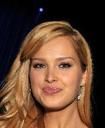
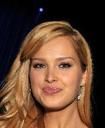
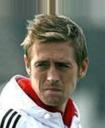
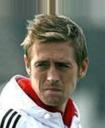
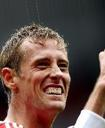
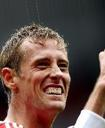
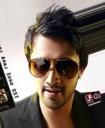
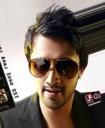
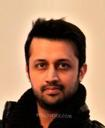
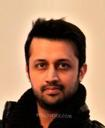
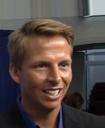
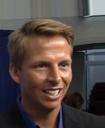
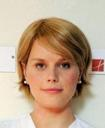
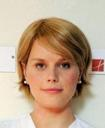
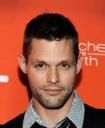
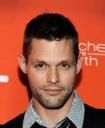
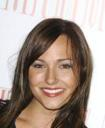
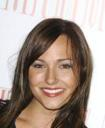
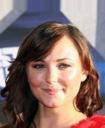
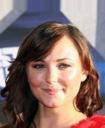

In [51]:
dp.lz[slices[:, 1] == 1]

In [34]:
import numpy as np
x = np.array([1,2,2,3,3,1])[:, np.newaxis]
y = np.array([3,2,1])[np.newaxis, :]
x == y


array([[False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True]])

In [23]:
ll_loaded.mean([1,2,3])

2.0

In [24]:
decision_tree.compute_decision_path()

ObjectRef(00ffffffffffffffffffffffffffffffffffffff0100000001000000)

['__annotations__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_clone',
 '_clone_keys',
 '_collate',
 '_convert_to_batch_fn',
 '_copy_data',
 '_data',
 '_get',
 '_get_collate_fns',
 '_get_state',
 '_init_node',
 '_inspect_function',
 '_repr_html_',
 '_repr_pandas_',
 '_set_data',
 '_set_state',
 '_state_keys',
 '_view_data',
 'add_column',
 'append',
 'batch',
 'columns',
 'consolidate',
 'copy',
 'data',
 'filter',
 'from_arrow',
 'from_batch',
 'from_batches',
 'from_csv',
 'from_dict',
 'from_feather',
 'from_huggingface',
 'from_jsonl',
 'from_pandas',
 'get_proven